<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass-Lab  <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Earthquake data)
The data records the earthquakes experienced for the last few years in the USA. There are four parameters in the data, where each data point represents an earthquake.

**Latitude**: Latitude of the place (above the equator)

**Longitude**: Longitude of the place (west of the prime meridian)

**DepthMeters**: Absolute height of the place

**Magnitude**: Magnitude of the earthquake wave

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[K-means Clustering](#k-means)**
3. **[Interpret the Clusters](#inter)**

#### Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file and print the first five observations.

In [2]:
df = pd.read_csv('Earthquake_Data.csv')
df.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the number of variables and the number of observations in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.shape

(1647, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the datatype of each variable in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.dtypes

Latitude       float64
Longitude      float64
DepthMeters      int64
Magnitude      float64
dtype: object

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find if there are missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the summary statistic of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the outliers in the dataset using boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

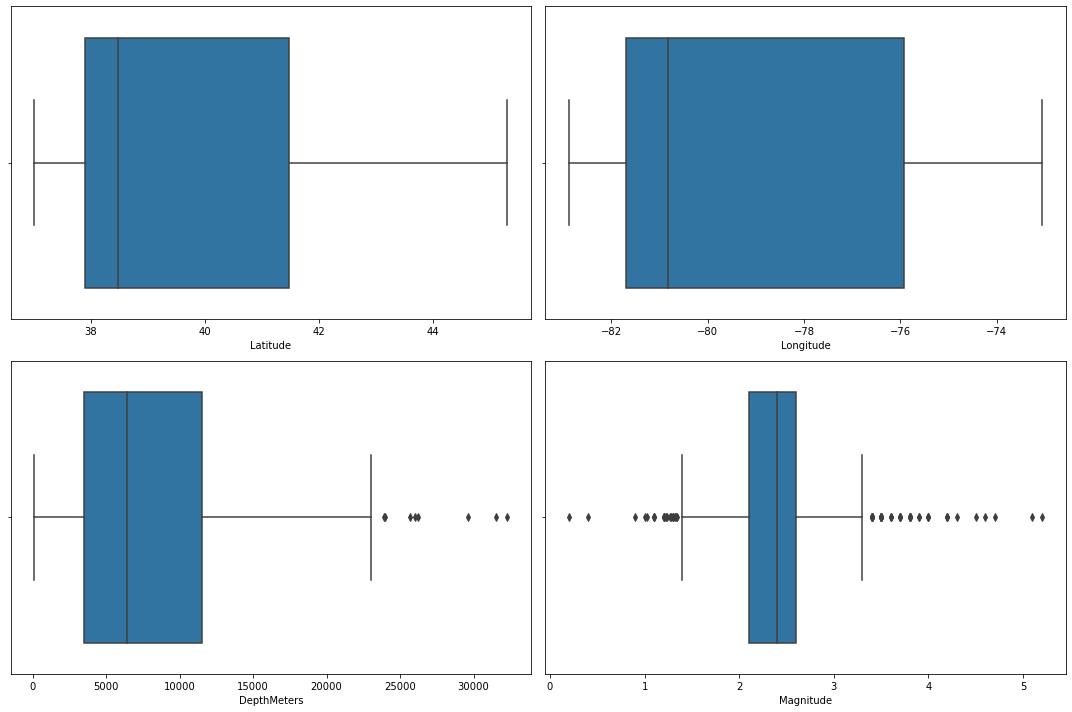

In [7]:
row = 2
col = 2
k =1
plt.figure(figsize=(15,10))
for c in df.columns:
    plt.subplot(row,col,k)
    sns.boxplot(df[c])
    k=k+1
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Remove the outliers using the IQR method and check the shape of data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
outliers=df[df[((df<LB)|(df>UB))].any(axis=1)]

In [9]:
df_outliers_rm=df[~df[((df<LB)|(df>UB))].any(axis=1)]

In [10]:
df_new=df_outliers_rm

In [11]:
df_new.skew()

Latitude       0.789615
Longitude      0.621269
DepthMeters    0.480208
Magnitude     -0.172136
dtype: float64

In [12]:
df_new.shape

(1562, 4)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Drop the variables representing the geographical coordinates of the earthquake.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df_feat = df_new.drop(["Latitude", "Longitude"], axis = 1)

# check the first five observations
df_feat.head()

,DepthMeters,Magnitude
0,5000,2.8
1,11500,2.8
2,18000,2.1
3,5000,2.4
5,2300,2.4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Transform the variables such that it will have mean 0 and standard deviation 1 and print the summary statistics.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaled_features= StandardScaler().fit_transform(df_feat)
summary = pd.DataFrame(scaled_features, columns = df_feat.columns)

In [16]:
summary.describe()

,DepthMeters,Magnitude
count,1.562000e+03,1.562000e+03
mean,5.117545e-18,5.544718e-16
std,1.000320e+00,1.000320e+00
min,-1.463207e+00,-2.750825e+00
25%,-8.070463e-01,-7.350195e-01
50%,-2.105364e-01,1.167292e-01
75%,8.035303e-01,6.845617e-01
max,3.090151e+00,2.671975e+00


<a id="k-means"> </a>
## 2. K-means Clustering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find within cluster sum of squares for the number of clusters from 1 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
from sklearn.cluster import KMeans

In [18]:
wcss  = []
for k in range(1,8):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(summary)
    wcss.append(kmeans.inertia_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the elbow plot to get the optimal value of K.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

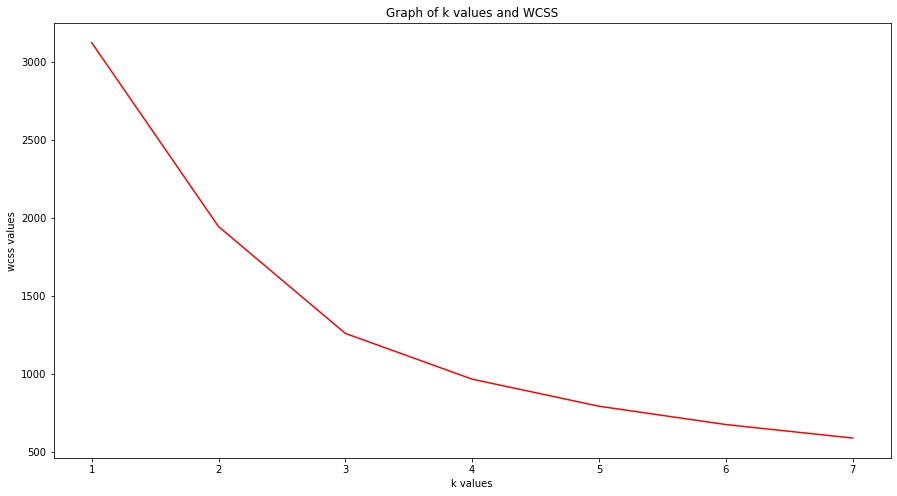

In [19]:
plt.plot(range(1,8), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the silhouette coefficient for the number of clusters from 2 to 7.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Plot of silhouette coefficients using appropriate graphical method.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Visualize the silhouette scores using silhouette plot and obtain the clusters for K from 2 to 6.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# write your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Fit K means clustering algorithm with an optimal number of clusters.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
m1 = KMeans(n_clusters=3,n_init=20,random_state=2)

m1.fit(summary)

KMeans(n_clusters=3, n_init=20, random_state=2)

In [38]:
m1.inertia_

1257.9770800049273

In [39]:
m1.labels_

array([0, 2, 2, ..., 1, 2, 2])

<a id="inter"> </a>
## 3. Interpret the Clusters

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Consider the groups formed in the previous question and display the size of each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
pd.DataFrame(m1.labels_)[0].value_counts()

0    685
2    477
1    400
Name: 0, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot the number of observations in each cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

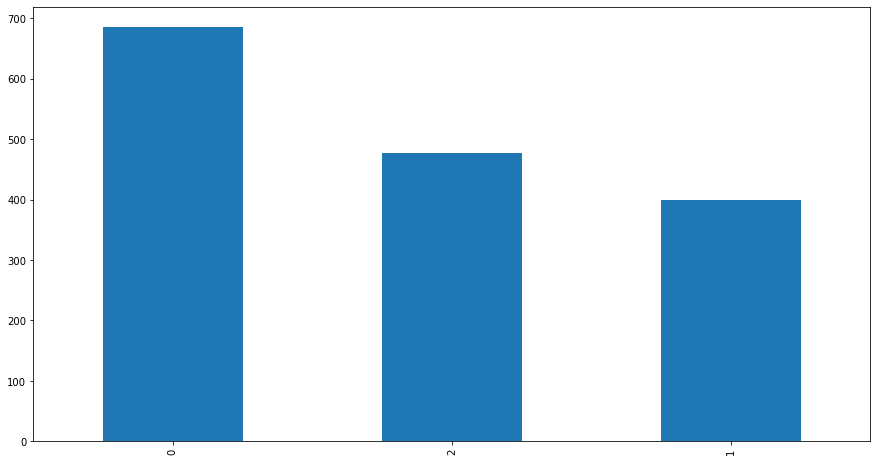

In [48]:
pd.DataFrame(m1.labels_)[0].value_counts().plot(kind='bar')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Obtain the centroids of the clusters formed using K-means clustering.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(summary))
columns = list(summary)
centroid_df.columns=columns
centroid_df

,DepthMeters,Magnitude
0,-0.719645,0.591926
1,-0.168492,-1.212780
2,1.174746,0.166965


<AxesSubplot:xlabel='DepthMeters', ylabel='Magnitude'>

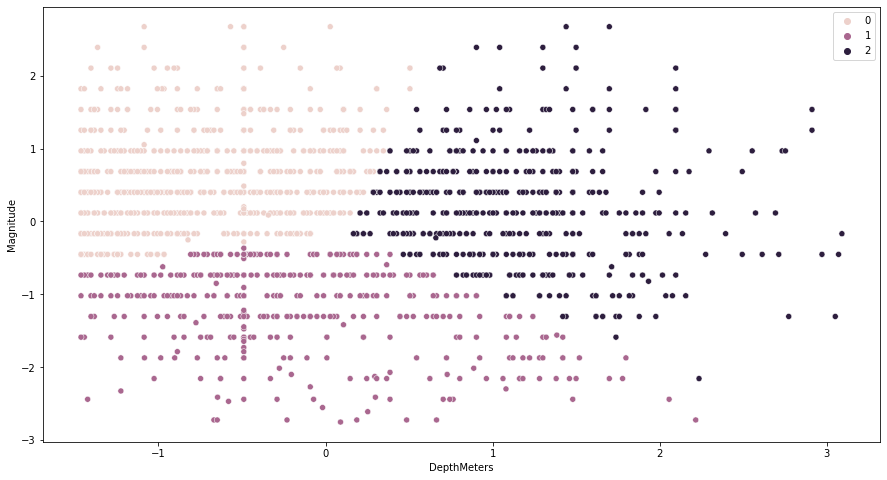

In [43]:
sns.scatterplot(summary['DepthMeters'],summary['Magnitude'],hue=m1.labels_)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Obtain the observations belonging to the 1st cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
df_new['Labels']=m1.labels_

In [45]:
df_new[df_new['Labels']==0].describe()

,Latitude,Longitude,DepthMeters,Magnitude,Labels
count,685.000000,685.000000,685.000000,685.000000,685.0
mean,39.070120,-80.180605,3839.562044,2.567372,0.0
std,1.997227,2.657267,2515.001619,0.229455,0.0
min,37.050000,-82.616800,100.000000,2.200000,0.0
25%,37.800700,-81.979700,1500.000000,2.400000,0.0
50%,38.058200,-81.498000,3700.000000,2.500000,0.0
75%,40.204800,-78.973700,5600.000000,2.700000,0.0
max,45.290000,-73.249000,10000.000000,3.300000,0.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Obtain the observations belonging to the 2nd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
df_new[df_new['Labels']==1].describe()

,Latitude,Longitude,DepthMeters,Magnitude,Labels
count,400.000000,400.000000,400.000000,400.000000,400.0
mean,40.522600,-77.891643,6611.450000,1.931725,1.0
std,2.407889,3.259108,3683.651261,0.211741,0.0
min,37.007700,-82.825500,100.000000,1.390000,1.0
25%,38.072225,-81.467325,4200.000000,1.800000,1.0
50%,40.317100,-77.212500,6000.000000,2.000000,1.0
75%,42.917800,-74.528075,8772.500000,2.100000,1.0
max,45.300900,-73.063400,18600.000000,2.230000,1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Obtain the observations belonging to the 3rd cluster and get the summary of the cluster.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
df_new[df_new['Labels']==2].describe()

,Latitude,Longitude,DepthMeters,Magnitude,Labels
count,477.000000,477.000000,477.000000,477.000000,477.0
mean,40.314354,-78.646559,13366.939203,2.417694,2.0
std,2.546376,3.250720,2846.765942,0.272955,0.0
min,37.179900,-82.548100,8300.000000,1.600000,2.0
25%,38.033300,-81.583500,11300.000000,2.200000,2.0
50%,39.697000,-80.485000,13100.000000,2.400000,2.0
75%,42.589000,-74.979500,14900.000000,2.600000,2.0
max,45.296000,-73.190000,23000.000000,3.300000,2.0
